0.3534056281076645
1.6683931244361312


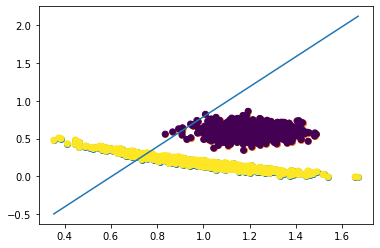

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(122)

# generate 10 points per class
N = 1000

X1_1 = 2 * np.random.normal(loc=0.5, scale=0.1, size=N)
X2_1 = np.exp(-X1_1) + np.random.normal(loc = 0, scale = 0.02, size=N) - 0.2
Y1 = np.ones(N)
X1_2 = 2*np.random.normal(loc=0.6, scale=0.05, size=N)
X2_2 = np.random.normal(loc=0.6, scale=0.07, size=N) #X1 * 2 + np.random.normal(loc = 0, scale = 0.1, size=N)
Y2 = -np.ones(N)

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

# generate w_0,....,w_n
w = np.random.uniform(low=-0.1, high = 0.1,size=3)
#w = w / np.linalg.norm(w)

#print(w)
#print(np.linalg.norm(w))

X0 = np.ones(N * 2)
#X0 = X0[:, np.newaxis]

X1 = np.concatenate((X1_1, X1_2))
X2 = np.concatenate((X2_1, X2_2))

X = np.stack((X0, X1, X2), axis=1)

y = np.concatenate((Y1, Y2))

rand_perm = np.random.permutation(range(y.shape[0]))

X = X[rand_perm, :]
y = y[rand_perm]

plt.plot([np.min(X[:, 1]), np.max(X[:, 1])], [np.min(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2], np.max(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2]])
print(np.min(X[:, 1]))
print(np.max(X[:,1]))

#X = np.hstack((X0, np.vstack((X1, X2))))
plt.scatter(X[:, 1], X[:, 2], c=y)


In [2]:
def error_w(X, y, w):
    error = np.sum(np.square(y - np.dot(X, w))) / 2.0
    return error

#error_w(X, y, w)

# of epochs =  100
# of errors =  6.0


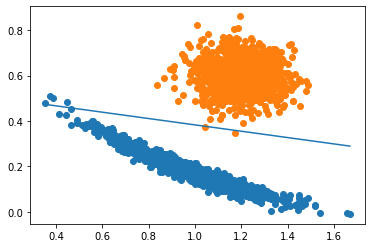

In [3]:
# generate w_0,....,w_n
w = np.random.uniform(low=-1.0, high = 1.0,size=3)

# set learning rate 0 < eta <= 1
eta = 1e-4

# check epochs
epochs = 0

max_epochs = 100

# track total error per epoch
total_error = np.zeros(max_epochs)

# set checkpoint
total_num_errors = np.zeros(max_epochs)

while (epochs < max_epochs):
    
    total_error[epochs] = error_w(X, y, w)
    
    total_num_errors[epochs] = sum((y * np.sign(np.dot(X, w))) < 0)

    errors = y - np.dot(X, w)
    
    w = w + eta * np.dot(X.transpose(), errors)
    
    epochs += 1
    
    
    
#print("# of errors = ", num_errors)
    
plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
#print(eta)
print("# of epochs = ", epochs)
print("# of errors = ", total_num_errors[-2])
plt.plot([np.min(X1), np.max(X1)], [np.min(X1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]])

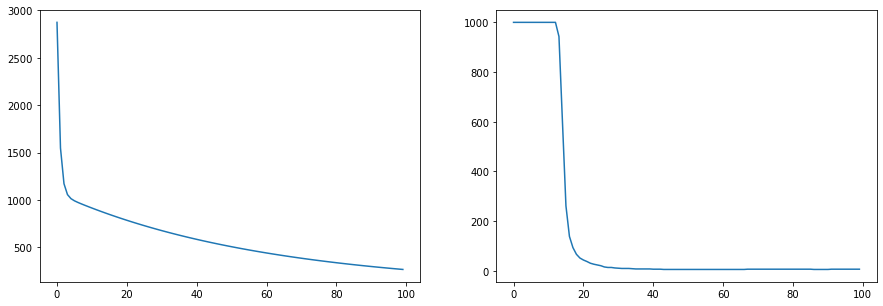

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
axs[0].plot(range(sum(total_error > 0)), total_error[total_error > 0])
axs[1].plot(range(sum(total_error > 0)), total_num_errors[total_error > 0])
#fig.suptitle('Categorical Plotting')